In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import itertools
from scipy import stats
import nibabel as nib
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.colors as mplcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [53]:
RAM_t_df = pd.read_csv(os.path.join(ram_data_dir, 'ram_time_stability.csv'), index_col=0)
pyFR_t_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr_time_stability.csv'), index_col=0)

In [54]:
chunk_size=10000

In [55]:
RAM_t_df['time_idx'] = RAM_t_df.index
RAM_t_df['sample_idx'] = (RAM_t_df.index * 10000) + 10000
RAM_t_df['percent_idx'] = (RAM_t_df.sample_idx / (RAM_t_df.samples/2))
RAM_t_df['second_idx'] = ((RAM_t_df.index * 10000) + 10000/RAM_t_df.sample_rate)

In [61]:
RAM_t_df_long = RAM_t_df.melt(id_vars=['Subject', 'sample_rate', 'samples','time_idx', 'sample_idx', 'percent_idx', 'second_idx'], 
                              var_name='Type', value_name='Correlation')

In [62]:
RAM_t_df_long

,Subject,sample_rate,samples,time_idx,sample_idx,percent_idx,second_idx,Type,Correlation
0,R1061T_RAM_CatFR1_0,250,773040,0,10000,0.025872,40.0,rand,0.998696
1,R1061T_RAM_CatFR1_0,250,773040,1,20000,0.051744,10040.0,rand,0.999404
2,R1061T_RAM_CatFR1_0,250,773040,2,30000,0.077616,20040.0,rand,0.999605
3,R1061T_RAM_CatFR1_0,250,773040,3,40000,0.103488,30040.0,rand,0.999709
4,R1061T_RAM_CatFR1_0,250,773040,4,50000,0.129359,40040.0,rand,0.999741
5,R1061T_RAM_CatFR1_0,250,773040,5,60000,0.155231,50040.0,rand,0.999783
6,R1061T_RAM_CatFR1_0,250,773040,6,70000,0.181103,60040.0,rand,0.999813
7,R1061T_RAM_CatFR1_0,250,773040,7,80000,0.206975,70040.0,rand,0.999825
8,R1061T_RAM_CatFR1_0,250,773040,8,90000,0.232847,80040.0,rand,0.999834
9,R1061T_RAM_CatFR1_0,250,773040,9,100000,0.258719,90040.0,rand,0.999849


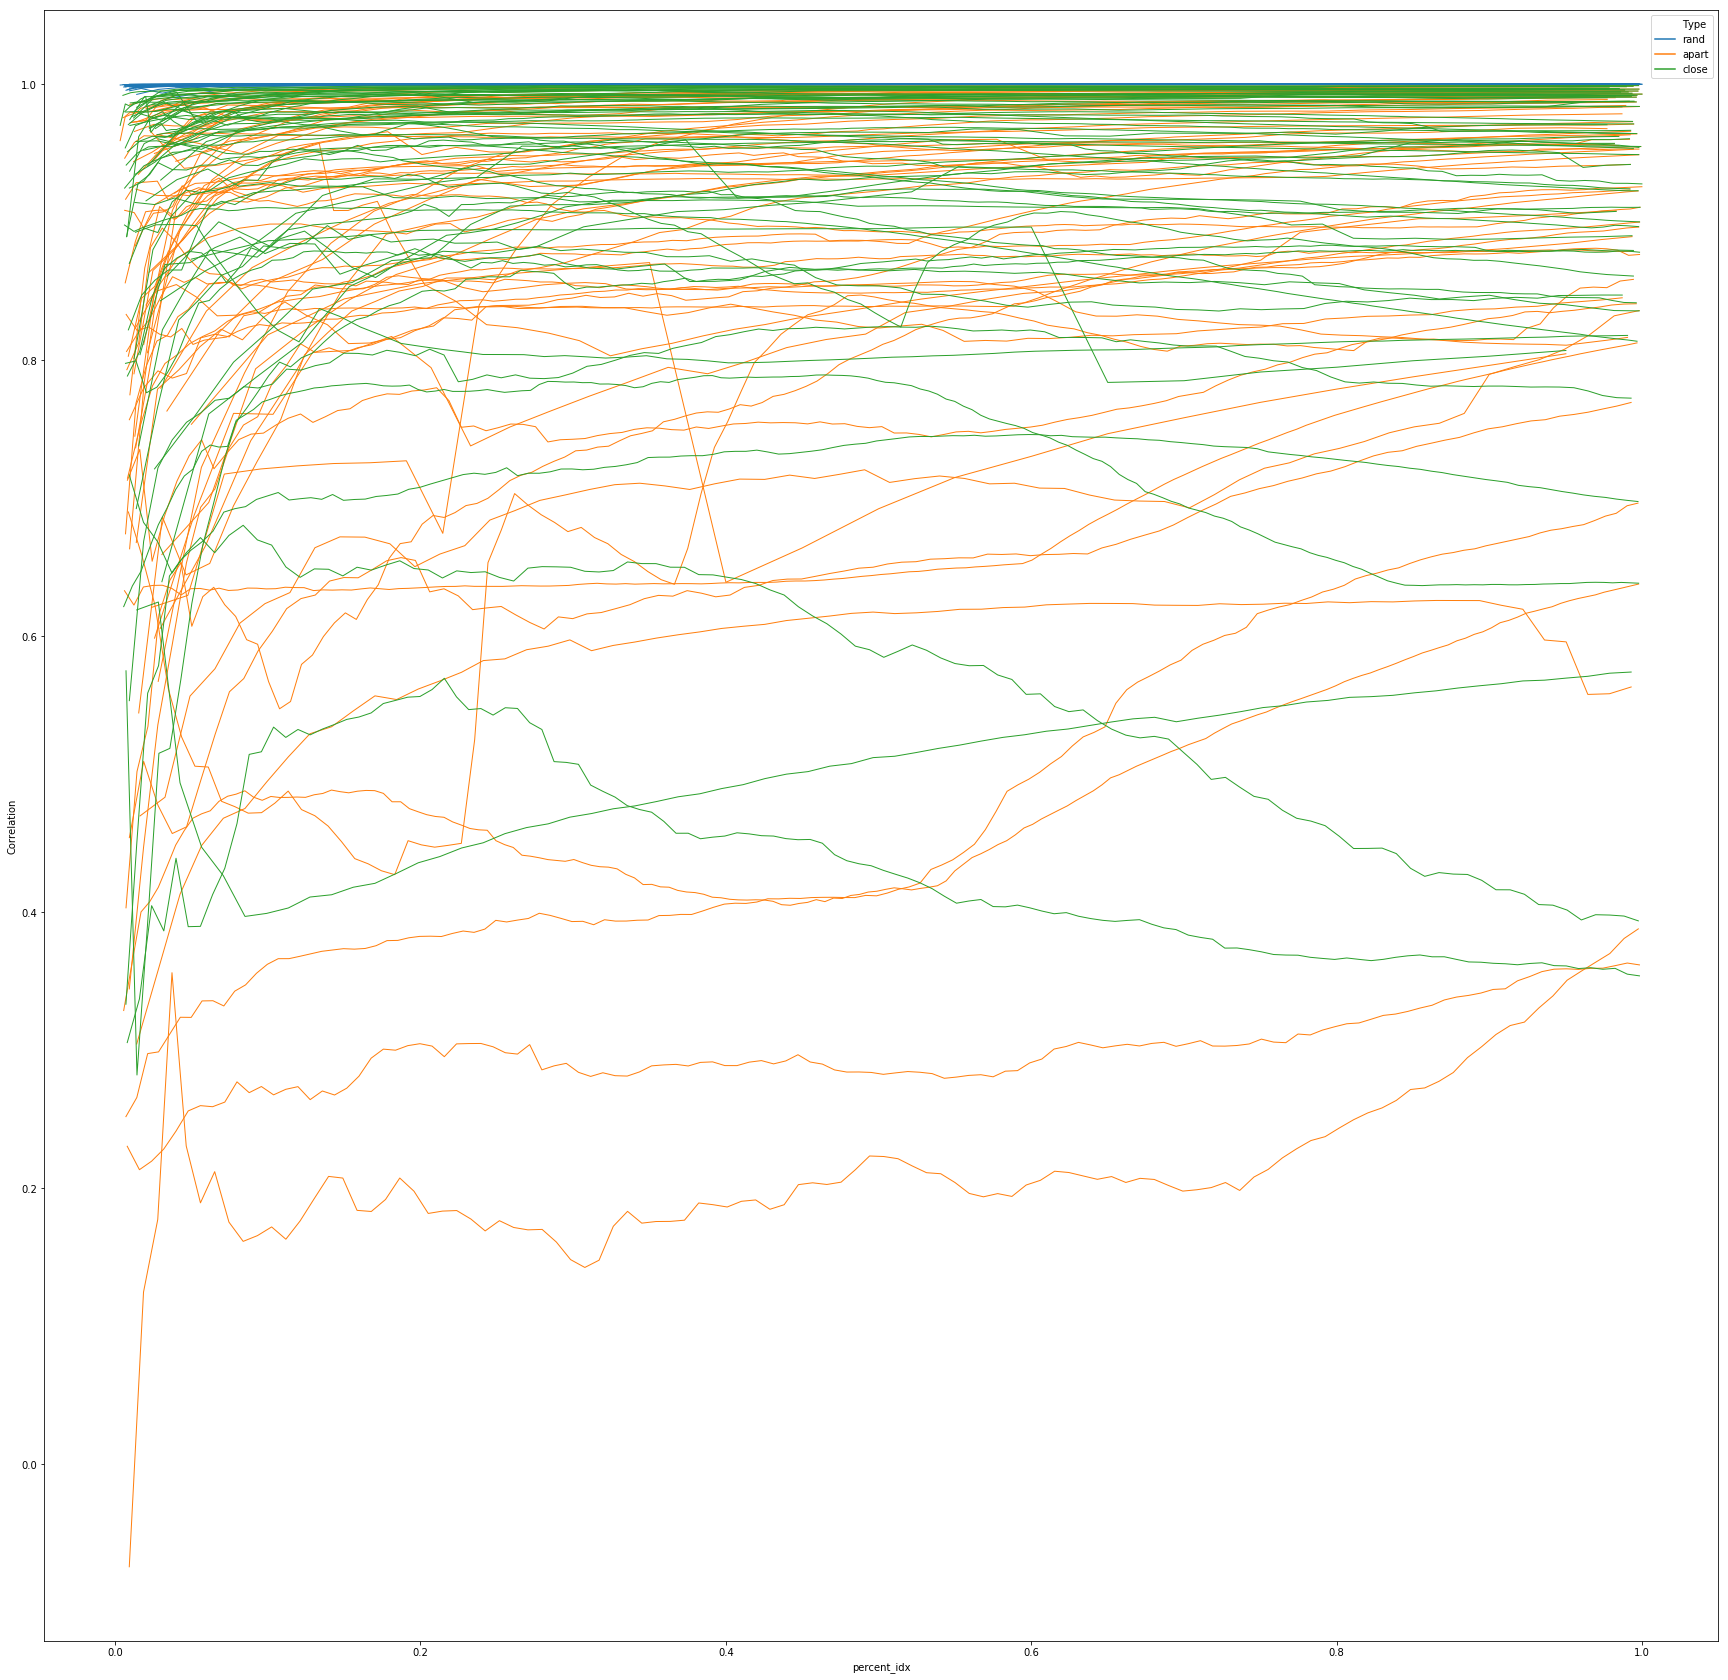

In [77]:
fig, ax = plt.subplots(figsize=[30,30])
ax = sns.lineplot(x="percent_idx", y="Correlation",
                  hue="Type", data=RAM_t_df_long)

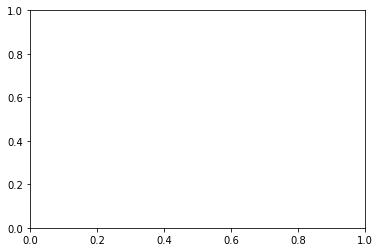

<Figure size 7200x7200 with 0 Axes>

In [72]:
fig, ax = plt.subplots(figsize=[100,100])
fig = plt.figure(figsize=[100,100])


In [ ]:

def numfmt(x, pos):
    s = '{}'.format(np.round((x / (100 / percent_increase) + (percent_increase / 100)), 2))
    return s


yfmt = tkr.FuncFormatter(numfmt)  # create your custom formatter function

fig, ax = plt.subplots()
#fig.gca().xaxis.set_major_formatter(yfmt)
ax.plot(corrs_close, 'k', label='Close')
ax.plot(corrs_apart, 'r', label='Apart')
ax.plot(corrs_rand, 'g', label='Random')
leg = ax.legend()
plt.ylabel('Correlation of matrices')
plt.xlabel('% Time')

plt.show()

In [8]:
# RAM_p_df = np.load(os.path.join(ram_data_dir, 'ram_patient_stability.npz'))
# pyFR_p_df = np.load(os.path.join(pyfr_data_dir, 'pyfr_patient_stability.npz'))

In [12]:
#pyFR_p_df['rand']

array([0.11777856, 0.07098411, 0.10199136, 0.13436348, 0.15075212,
       0.18511556, 0.21581228, 0.21464981, 0.26081764, 0.24984862,
       0.24360408, 0.16437537, 0.17818655, 0.18304761, 0.18266326,
       0.19118638, 0.19219629, 0.16275737, 0.1668177 , 0.15899731,
       0.1614587 , 0.16394592, 0.16139346, 0.15794364, 0.15852812,
       0.15890963, 0.15847379, 0.15954422, 0.15987668, 0.1612001 ,
       0.16239618, 0.16660069, 0.1665489 , 0.16736319])